In [21]:
from RBM import RBM
import numpy as np
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
# Load MNIST Data
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data',
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.ToTensor()])
                  ),
    batch_size=batch_size
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data',
        train=False,
        transform=transforms.Compose(
            [transforms.ToTensor()])
                  ),
    batch_size=batch_size
)

In [23]:
VIS_NUM = 28*28
HID_NUM = 128
rbm = RBM(VIS_NUM, HID_NUM, k=5)

In [24]:
def show_adn_save(file_name,img):
    npimg = np.transpose(img.numpy(),(1,2,0))
    f = "./%s.png" % file_name
    plt.imshow(npimg)
    plt.imsave(f,npimg)

In [41]:
for batch, _ in train_loader:
        batch = batch.view(len(batch), VIS_NUM)
        rbm.train(batch)
print(rbm.error)

tensor(763.1316)


torch.Size([32, 784])


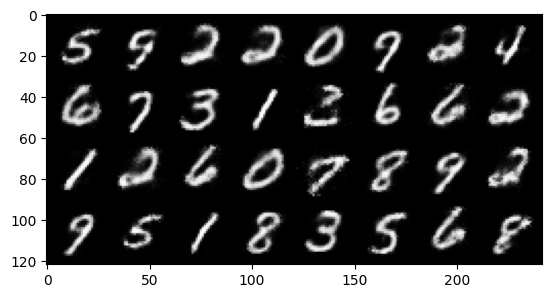

In [42]:
show_adn_save("real",make_grid(rbm.sample_visible(rbm.sample_hidden(batch)[0])[0].view(32,1,28,28).data))

In [51]:
valid = [batch.view(len(batch), VIS_NUM) for batch, _ in test_loader][0]

In [52]:
print(valid.shape)

torch.Size([64, 784])
